# Credit Risk Assessment

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from credit_risk_assessment import *

## Calculate RFMS components

In [2]:
# path to the CSV file
filename = 'featured_df.parquet'
path = os.path.join('..', 'data/featured', filename)

# Load dataset
featured_df = load_data(path)
featured_df.info()
featured_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  float64            
 1   BatchId                   95393 non-null  float64            
 2   AccountId                 95393 non-null  float64            
 3   SubscriptionId            95393 non-null  float64            
 4   CustomerId                95393 non-null  float64            
 5   CurrencyCode              95393 non-null  float64            
 6   CountryCode               95393 non-null  float64            
 7   ProviderId                95393 non-null  float64            
 8   ProductId                 95393 non-null  float64            
 9   ProductCategory           95393 non-null  float64            
 10  ChannelId                 95393 non-null  float64            
 11  Amount         

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,1.097554,-0.015739,0.152495,1.668598,0.595592,0.0,0.0,1.025586,-1.579657,-0.797775,0.748262,-0.099739,-0.292853,2018-11-15 02:18:49+00:00,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
1,1.013197,-0.571710,0.866893,0.345454,0.595592,0.0,0.0,-0.506537,0.913723,0.492978,-1.172748,-0.159500,-0.352663,2018-11-15 02:19:08+00:00,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
2,-0.287752,0.469870,0.371629,-1.201817,0.808675,0.0,0.0,1.025586,-1.718179,-0.797775,0.748262,-0.129034,-0.323368,2018-11-15 02:44:21+00:00,-0.352001,-0.014114,0.184840,-0.198738,-0.445132,-0.783585,-2.155000,-0.101329,0.848594,-0.994095
3,0.032646,-1.666070,0.996605,-1.226846,1.694602,0.0,0.0,-2.804723,-0.194446,4.365238,0.748262,1.013448,0.976583,2018-11-15 03:32:55+00:00,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095
4,-0.234407,0.055978,0.866893,0.345454,1.694602,0.0,0.0,-0.506537,0.913723,0.492978,-1.172748,-0.196059,-0.314579,2018-11-15 03:34:21+00:00,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095


## Weight of Evidence (WoE) binning

In [3]:
rfms_df = calculate_rfms_score(featured_df)
rfms_df
rfms_df.info()

Mean RFMS Score: -0.00
Median RFMS Score: 0.38
Standard Deviation of RFMS Scores: 1.43
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  float64            
 1   BatchId                   95393 non-null  float64            
 2   AccountId                 95393 non-null  float64            
 3   SubscriptionId            95393 non-null  float64            
 4   CustomerId                95393 non-null  float64            
 5   CurrencyCode              95393 non-null  float64            
 6   CountryCode               95393 non-null  float64            
 7   ProviderId                95393 non-null  float64            
 8   ProductId                 95393 non-null  float64            
 9   ProductCategory           95393 non-null  float64            


In [ ]:
rfms_df.head()

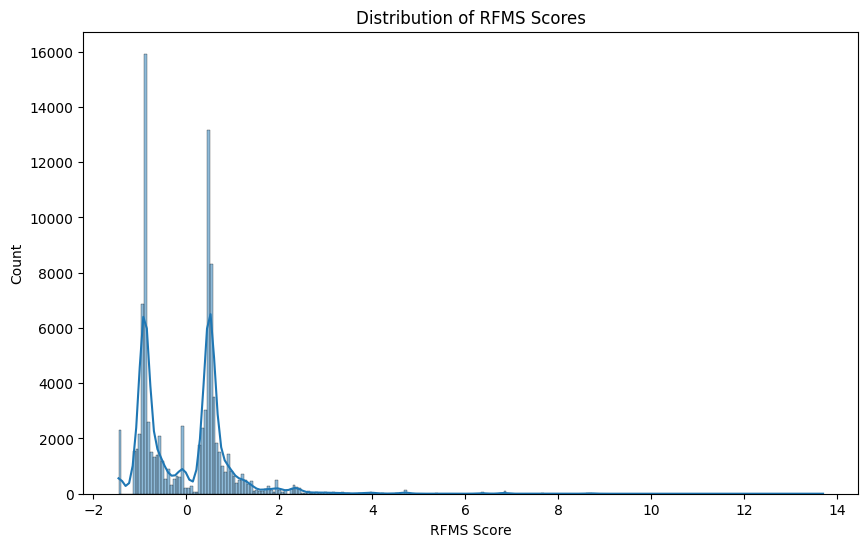

Mean RFMS Score: -0.00
Median RFMS Score: 0.26
Standard Deviation of RFMS Scores: 1.00


In [12]:
# Examine the RFMS score distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the RFMS score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=rfms_df, x='RFMS_Score', kde=True)
plt.title('Distribution of RFMS Scores')
plt.xlabel('RFMS Score')
plt.ylabel('Count')
plt.show()

# Calculate the central tendency and variability
mean_rfms = rfms_df['RFMS_Score'].mean()
median_rfms = rfms_df['RFMS_Score'].median()
std_rfms = rfms_df['RFMS_Score'].std()

print(f"Mean RFMS Score: {mean_rfms:.2f}")
print(f"Median RFMS Score: {median_rfms:.2f}")
print(f"Standard Deviation of RFMS Scores: {std_rfms:.2f}")

In [ ]:
rfms_df.info()

In [5]:
rfms_df = preprocess_data(rfms_df)

In [6]:
rfms_df

,RFMS_Score,RFMS_bin,Amount,Value,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,StdDev,Assessment_Binary,RFMS_bin_woe
0,-0.900552,0,-0.099739,-0.292853,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095,-1.009137,-0.719608,0.766793,-0.323907,0,-10.342049
1,-0.907971,0,-0.159500,-0.352663,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095,-1.009137,1.441846,-1.281614,-0.447545,0,-10.342049
2,-1.106788,0,-0.129034,-0.323368,-0.014114,0.184840,-0.198738,-0.445132,-0.783585,-2.155000,-0.101329,0.848594,-0.994095,-1.000266,-0.724095,0.767108,-0.623037,0,-10.342049
3,0.202991,1,1.013448,0.976583,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095,-1.009137,-0.722413,0.770518,1.250644,0,0.037177
4,-0.907971,0,-0.196059,-0.314579,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095,-1.009137,1.441846,-1.281614,-0.447545,0,-10.342049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95388,0.509593,2,-0.216917,-0.292853,-0.014114,0.298784,0.140112,0.203909,1.362774,-0.710872,-0.324472,-0.874127,1.005941,1.014645,1.441846,-1.281614,-0.447545,1,10.365171
95389,0.475700,1,-0.099739,-0.292853,-0.014114,0.187528,-0.121092,-0.398529,-0.567108,-0.710872,-0.324472,-0.874127,1.005941,1.020357,-0.722343,0.766954,-0.386024,1,0.037177
95390,0.509593,2,-0.159500,-0.352663,-0.014114,0.187528,-0.121092,-0.398529,-0.567108,-0.710872,-0.324472,-0.874127,1.005941,1.014645,1.441846,-1.281614,-0.447545,1,10.365171
95391,0.547053,2,0.017438,-0.170791,-0.014114,0.224626,-0.097136,0.148212,-0.478303,-0.504567,-0.324472,-0.874127,1.005941,1.014978,-0.699695,0.766804,-0.301275,1,10.365171


In [9]:
rfms_df['RFMS_bin_woe'].unique()

array([-10.34204867,   0.03717733,  -6.66915144,  10.3651713 ])

In [10]:
rfms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RFMS_Score                94593 non-null  float64
 1   RFMS_bin                  95393 non-null  int32  
 2   Amount                    95393 non-null  float64
 3   Value                     95393 non-null  float64
 4   FraudResult               95393 non-null  float64
 5   TotalTransactionAmount    95393 non-null  float64
 6   AverageTransactionAmount  95393 non-null  float64
 7   TransactionCount          95393 non-null  float64
 8   StdTransactionAmount      95393 non-null  float64
 9   TransactionHour           95393 non-null  float64
 10  TransactionDay            95393 non-null  float64
 11  TransactionMonth          95393 non-null  float64
 12  TransactionYear           95393 non-null  float64
 13  Recency                   95393 non-null  float64
 14  Freque

In [13]:
rfms_df.isna().sum()

RFMS_Score                  800
RFMS_bin                      0
Amount                        0
Value                         0
FraudResult                   0
TotalTransactionAmount        0
AverageTransactionAmount      0
TransactionCount              0
StdTransactionAmount          0
TransactionHour               0
TransactionDay                0
TransactionMonth              0
TransactionYear               0
Recency                       0
Frequency                     0
Monetary                      0
StdDev                      800
Assessment_Binary             0
RFMS_bin_woe                  0
dtype: int64

In [7]:
rfms_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,StdDev,RFMS_Score,RFMS_bin,Assessment,Assessment_Binary
0,1.097554,-0.015739,0.152495,1.668598,0.595592,0.0,0.0,1.025586,-1.579657,-0.797775,...,0.848594,-0.994095,-1.009137,-0.719608,0.766793,-0.323907,-1.285859,"(-2.081, -1.166]",Bad,0
1,1.013197,-0.571710,0.866893,0.345454,0.595592,0.0,0.0,-0.506537,0.913723,0.492978,...,0.848594,-0.994095,-1.009137,1.441846,-1.281614,-0.447545,-1.296450,"(-2.081, -1.166]",Bad,0
2,-0.287752,0.469870,0.371629,-1.201817,0.808675,0.0,0.0,1.025586,-1.718179,-0.797775,...,0.848594,-0.994095,-1.000266,-0.724095,0.767108,-0.623037,-1.580291,"(-2.081, -1.166]",Bad,0
3,0.032646,-1.666070,0.996605,-1.226846,1.694602,0.0,0.0,-2.804723,-0.194446,4.365238,...,0.848594,-0.994095,-1.009137,-0.722413,0.770518,1.250644,0.289612,"(-1.166, 0.714]",Bad,0
4,-0.234407,0.055978,0.866893,0.345454,1.694602,0.0,0.0,-0.506537,0.913723,0.492978,...,0.848594,-0.994095,-1.009137,1.441846,-1.281614,-0.447545,-1.296450,"(-2.081, -1.166]",Bad,0


In [18]:
rfms_df.isna().sum()

RFMS_Score                  0
RFMS_bin                    0
Amount                      0
Value                       0
FraudResult                 0
TotalTransactionAmount      0
AverageTransactionAmount    0
TransactionCount            0
StdTransactionAmount        0
TransactionHour             0
TransactionDay              0
TransactionMonth            0
TransactionYear             0
Recency                     0
Frequency                   0
Monetary                    0
StdDev                      0
Assessment_Binary           0
RFMS_bin_woe                0
dtype: int64

In [19]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'model_input')
filename = 'processed_model_input.parquet'

output_path = save_data(rfms_df, output_folder, filename)

Dataset saved to ..\data\model_input\processed_model_input.parquet
